In [1]:
import pandas as pd

# Read the text file with space as the delimiter
data = pd.read_csv("D:/6. Turbofan Engine Degradation Simulation Data Set/CMAPSSData/train_FD001.txt", delim_whitespace=True, header=None)

# Save to CSV
data.to_csv('output.csv', index=False, header=False)

print("Conversion complete.")

C:\Users\user\AppData\Local\Temp\ipykernel_14968\2362086335.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("D:/6. Turbofan Engine Degradation Simulation Data Set/CMAPSSData/train_FD001.txt", delim_whitespace=True, header=None)


Conversion complete.


In [2]:
import pandas as pd

# Load the data
df = pd.read_excel("C:/Users/user/Downloads/6.+Turbofan+Engine+Degradation+Simulation+Data+Set/6. Turbofan Engine Degradation Simulation Data Set/CMAPSSData/updated.xlsx")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
df.columns

Index(['unit_number', 'time_in_cycle', 'operational setting 1',
       'operational setting 2', 'operational setting 3',
       'sensor measurement  1', 'sensor measurement  2',
       'sensor measurement  3', 'sensor measurement  4',
       'sensor measurement  5', 'sensor measurement  6',
       'sensor measurement  7', 'sensor measurement  8',
       'sensor measurement  9', 'sensor measurement  10',
       'sensor measurement  11', 'sensor measurement  12',
       'sensor measurement  13', 'sensor measurement  14',
       'sensor measurement  15', 'sensor measurement  16',
       'sensor measurement  17', 'sensor measurement  18',
       'sensor measurement  19', 'sensor measurement  20',
       'sensor measurement  21'],
      dtype='object')

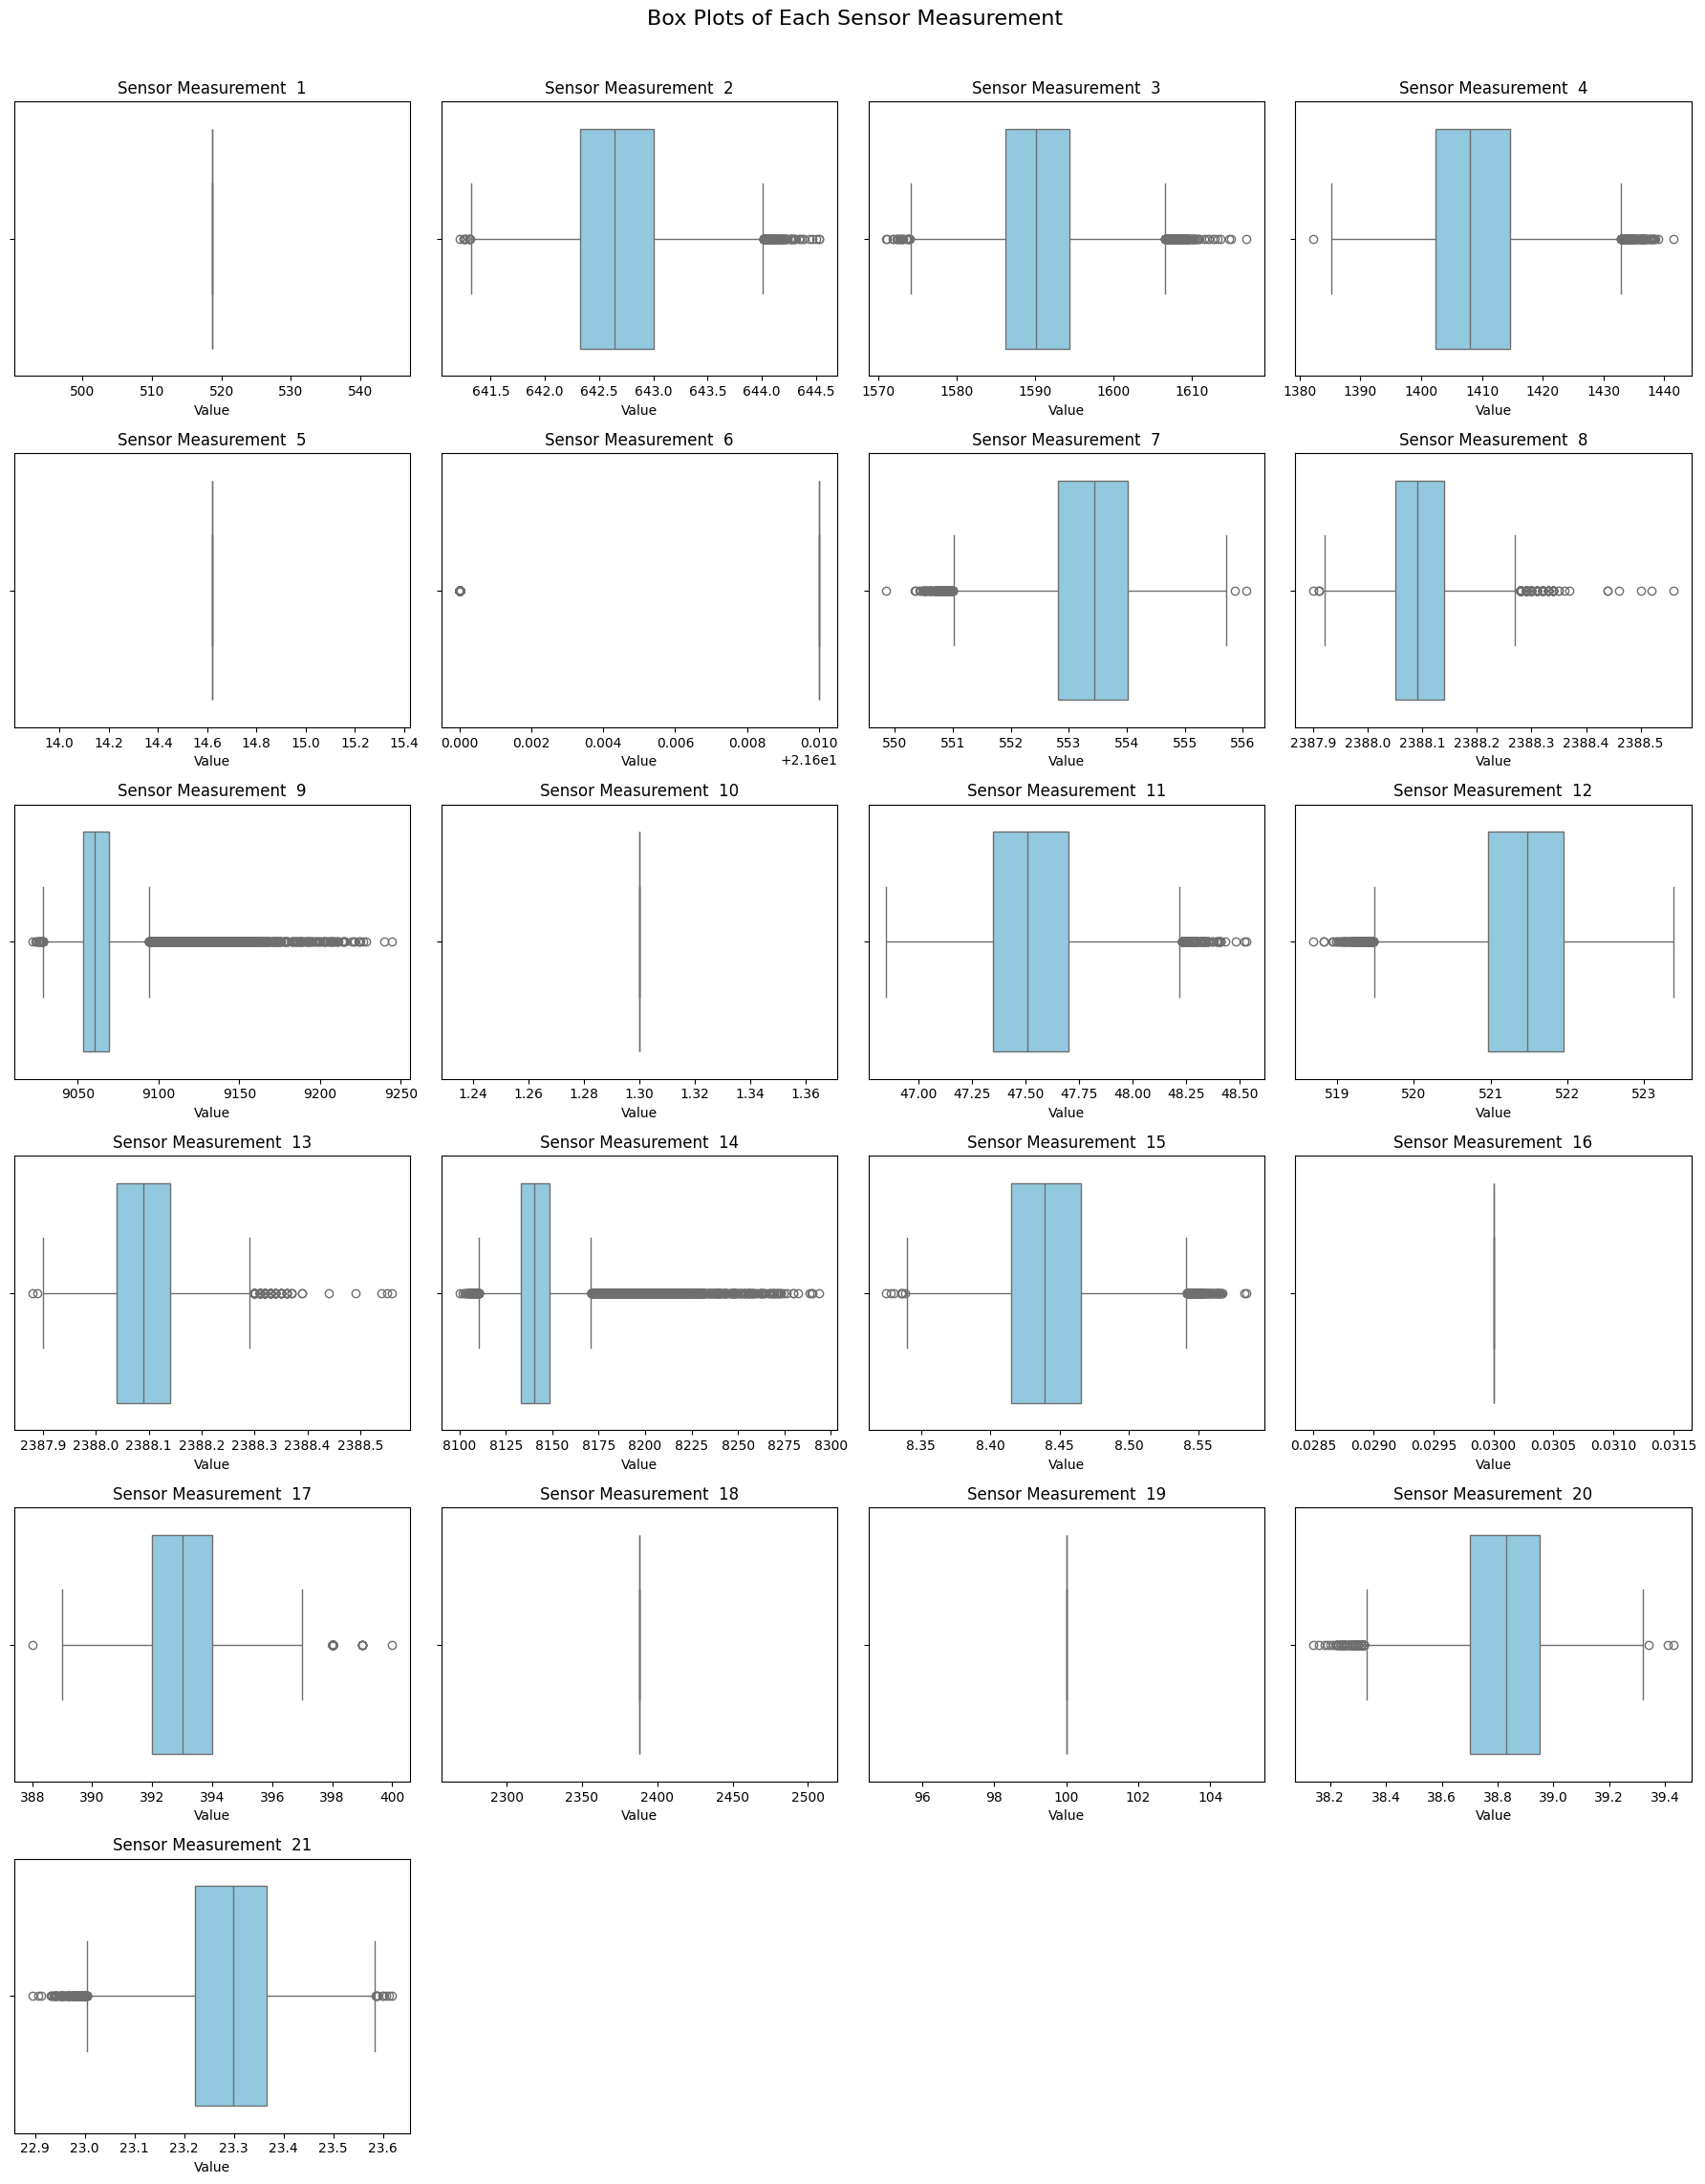

In [5]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Get only sensor columns
sensor_columns = [col for col in df.columns if 'sensor measurement' in col]
# Create subplots
num_sensors = len(sensor_columns)
cols = 4  # number of columns in the subplot grid
rows = math.ceil(num_sensors / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
fig.suptitle('Box Plots of Each Sensor Measurement', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, sensor in enumerate(sensor_columns):
    sns.boxplot(data=df[sensor], ax=axes[i], orient='h', color='skyblue')
    axes[i].set_title(sensor.replace('_', ' ').title())
    axes[i].set_xlabel('Value')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

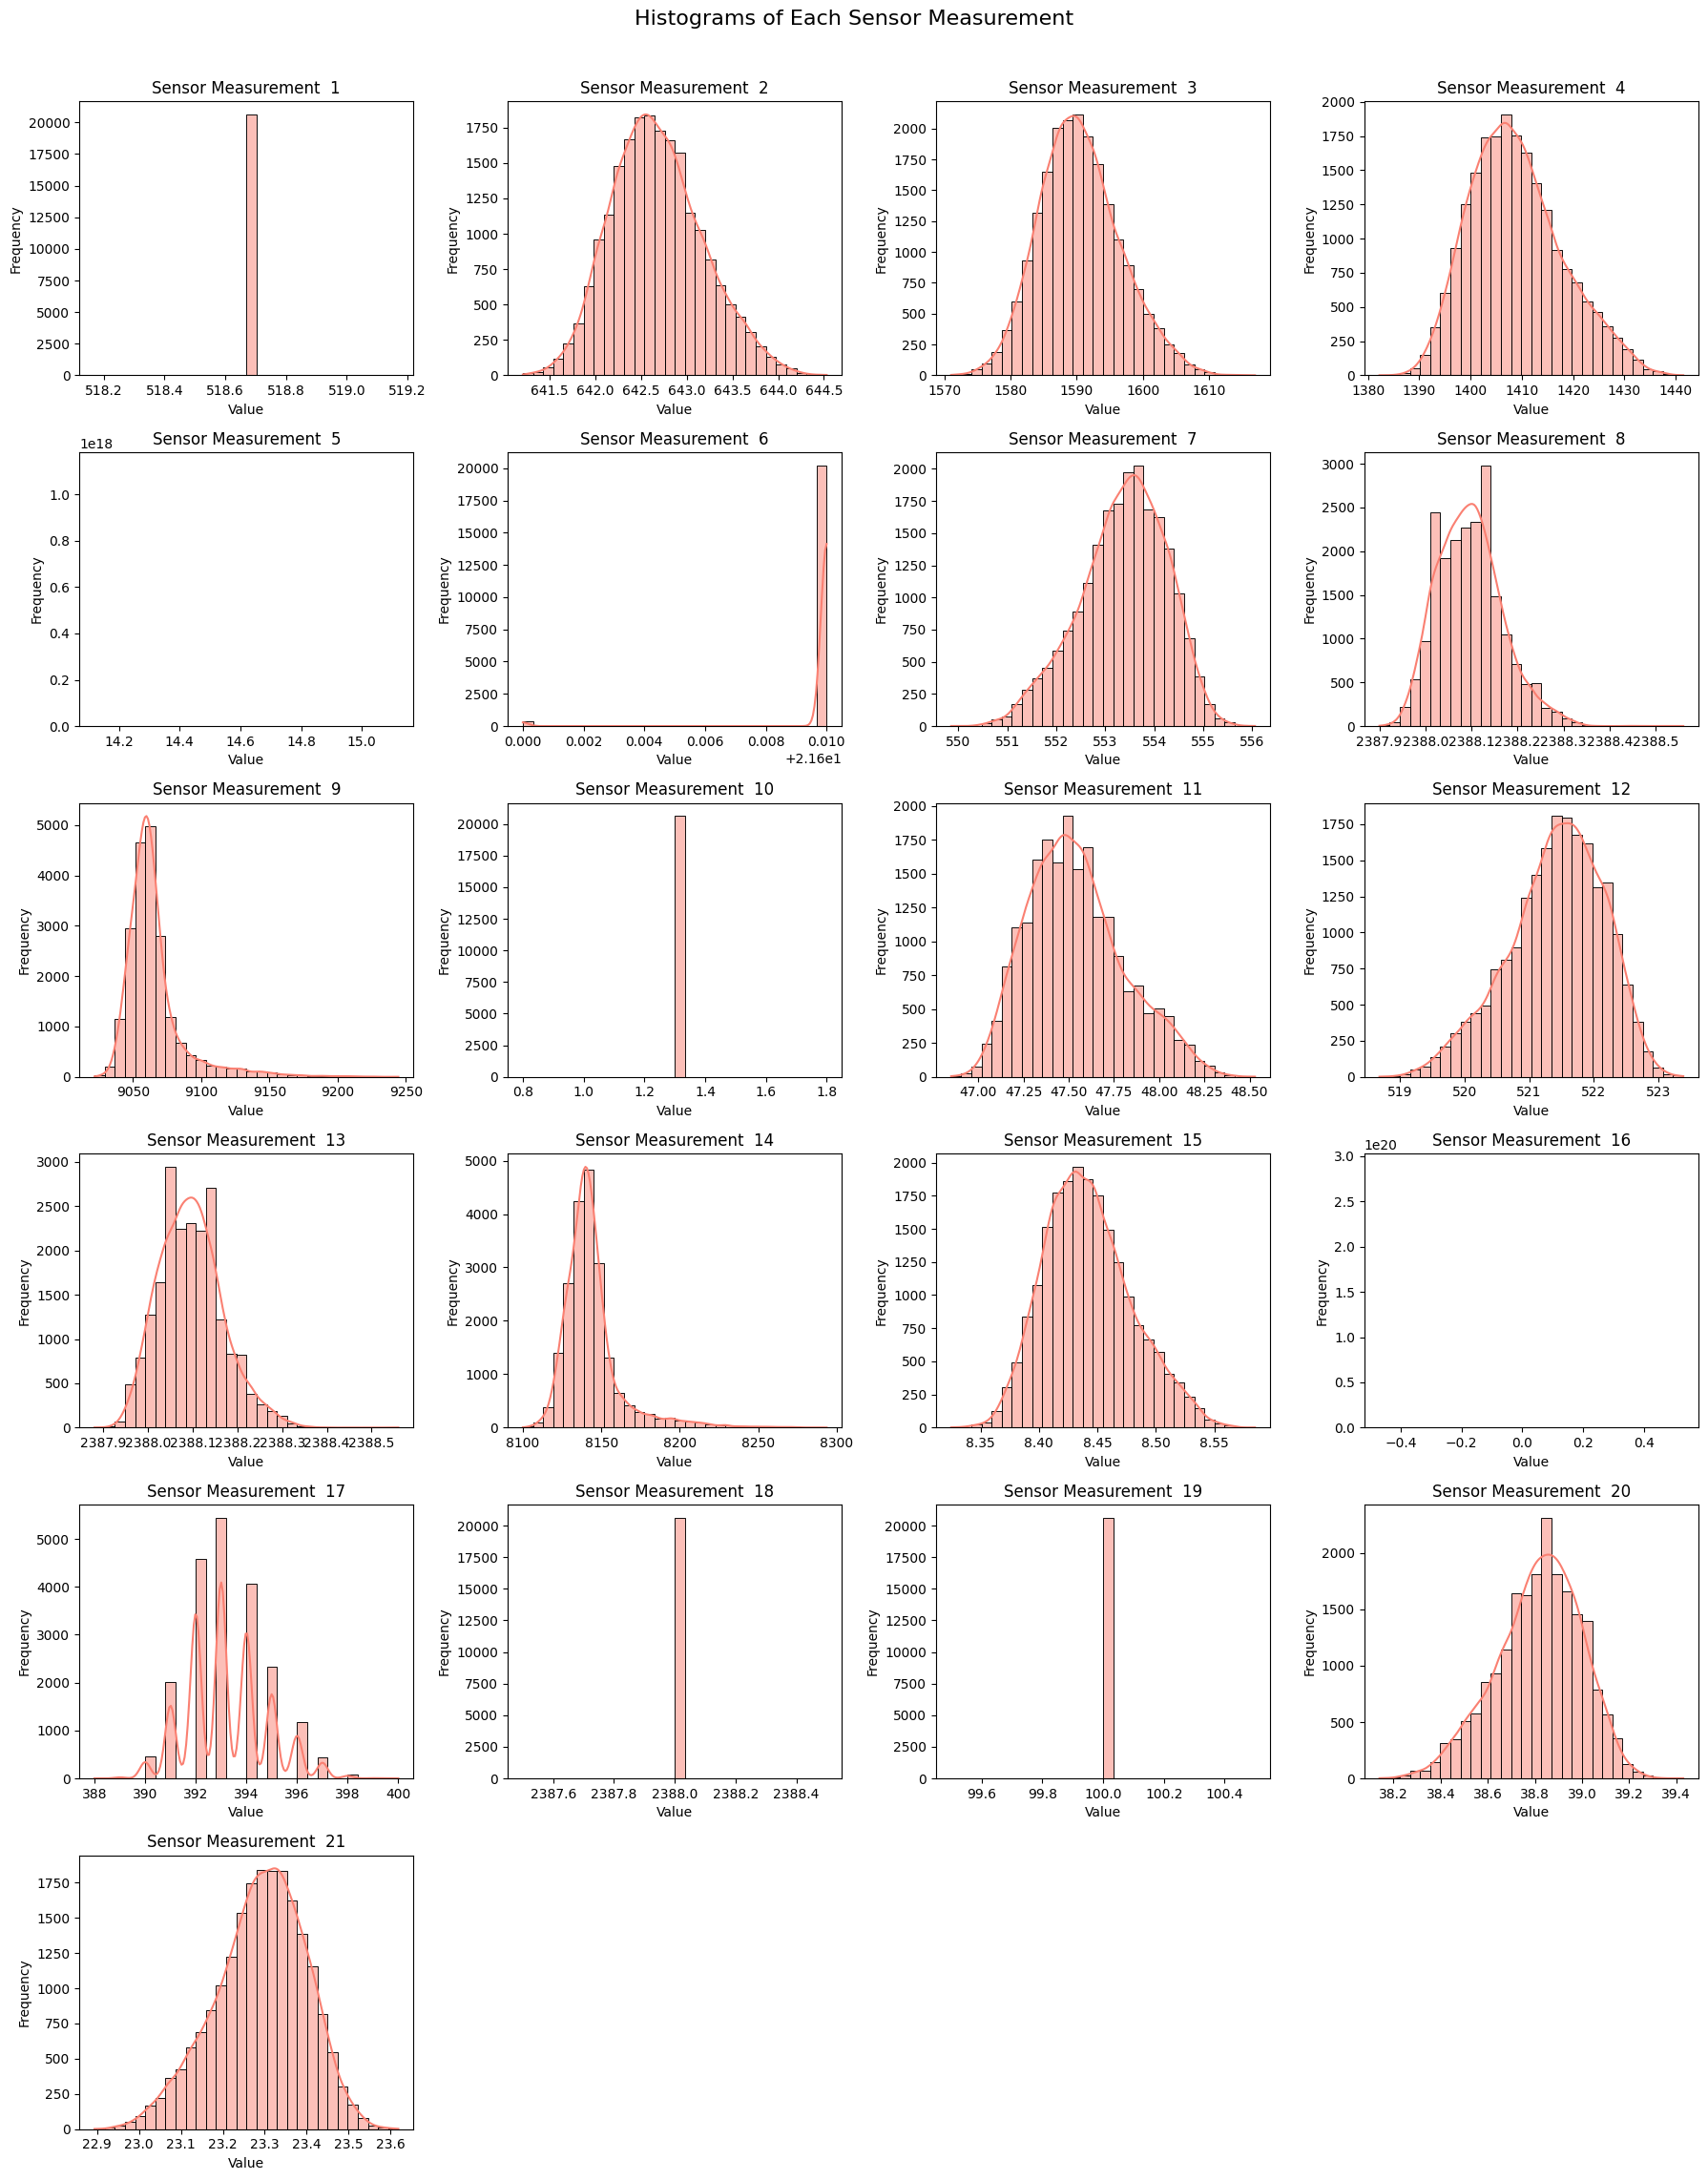

In [6]:
# Create subplots
num_sensors = len(sensor_columns)
cols = 4  # Number of columns in subplot grid
rows = math.ceil(num_sensors / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
fig.suptitle('Histograms of Each Sensor Measurement', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, sensor in enumerate(sensor_columns):
    sns.histplot(df[sensor], ax=axes[i], kde=True, color='salmon', bins=30)
    axes[i].set_title(sensor.replace('_', ' ').title())
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [7]:
# Calculate RUL (Remaining Useful Life)
rul = df.groupby('unit_number')['time_in_cycle'].max().reset_index()
rul.columns = ['unit_number', 'max_time']

# Merge to get RUL
df = df.merge(rul, on='unit_number')
df['RUL'] = df['max_time'] - df['time_in_cycle']

# Drop 'max_time' now
df.drop('max_time', axis=1, inplace=True)

# See sample
print(df.head())

   unit_number  time_in_cycle  operational setting 1  operational setting 2  \
0            1              1                -0.0007                -0.0004   
1            1              2                 0.0019                -0.0003   
2            1              3                -0.0043                 0.0003   
3            1              4                 0.0007                 0.0000   
4            1              5                -0.0019                -0.0002   

   operational setting 3  sensor measurement  1  sensor measurement  2  \
0                    100                 518.67                 641.82   
1                    100                 518.67                 642.15   
2                    100                 518.67                 642.35   
3                    100                 518.67                 642.35   
4                    100                 518.67                 642.37   

   sensor measurement  3  sensor measurement  4  sensor measurement  5  ...  \
0

In [8]:
df.RUL

0        191
1        190
2        189
3        188
4        187
        ... 
20626      4
20627      3
20628      2
20629      1
20630      0
Name: RUL, Length: 20631, dtype: int64

In [9]:
# Select feature columns
feature_cols = [col for col in df.columns if 'setting' in col or 'sensor measurement' in col]

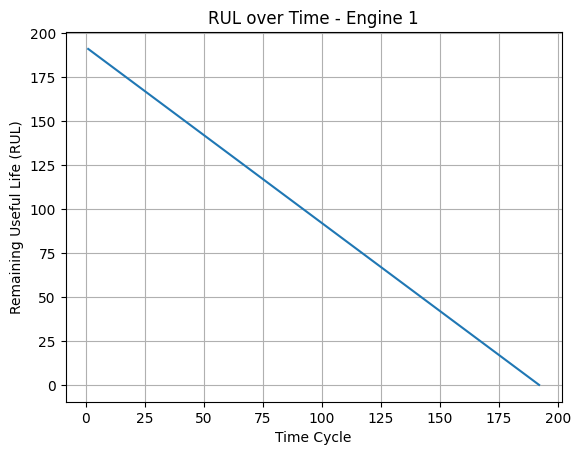

In [23]:
import matplotlib.pyplot as plt

engine_id = 1
sample_engine = df[df['unit_number'] == engine_id]

plt.plot(sample_engine['time_in_cycle'], sample_engine['RUL'])
plt.xlabel('Time Cycle')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title(f'RUL over Time - Engine {engine_id}')
plt.grid(True)
plt.show()

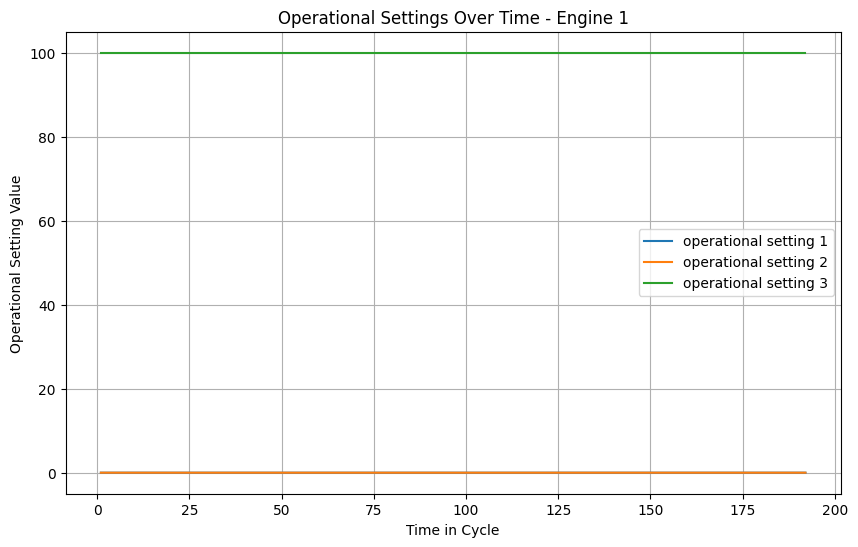

In [11]:
settings = ['operational setting 1', 'operational setting 2', 'operational setting 3']
engine_id = 1
engine_data = df[df['unit_number'] == engine_id]

plt.figure(figsize=(10, 6))
for setting in settings:
    plt.plot(engine_data['time_in_cycle'], engine_data[setting], label=setting)

plt.xlabel('Time in Cycle')
plt.ylabel('Operational Setting Value')
plt.title(f'Operational Settings Over Time - Engine {engine_id}')
plt.legend()
plt.grid(True)
plt.show()

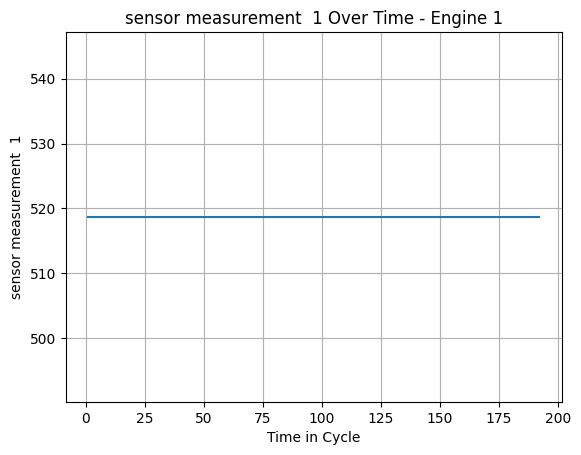

In [27]:
sensor = 'sensor measurement  1'
engine_id = 1

engine_data = df[df['unit_number'] == engine_id]

plt.plot(engine_data['time_in_cycle'], engine_data[sensor])
plt.xlabel('Time in Cycle')
plt.ylabel(sensor)
plt.title(f'{sensor} Over Time - Engine {engine_id}')
plt.grid(True)
plt.show()


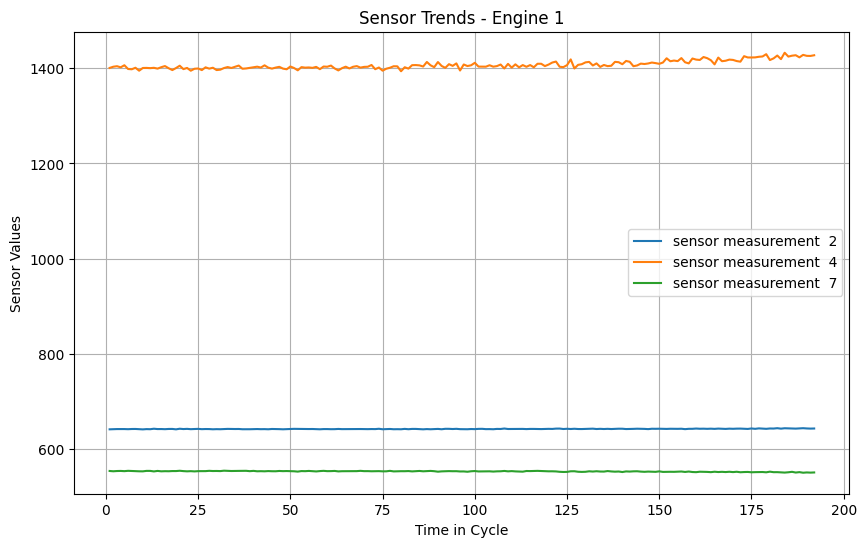

In [13]:
sensors = ['sensor measurement  2', 'sensor measurement  4', 'sensor measurement  7']
engine_id = 1
engine_data = df[df['unit_number'] == engine_id]

plt.figure(figsize=(10, 6))
for sensor in sensors:
    plt.plot(engine_data['time_in_cycle'], engine_data[sensor], label=sensor)

plt.xlabel('Time in Cycle')
plt.ylabel('Sensor Values')
plt.title(f'Sensor Trends - Engine {engine_id}')
plt.legend()
plt.grid(True)
plt.show()


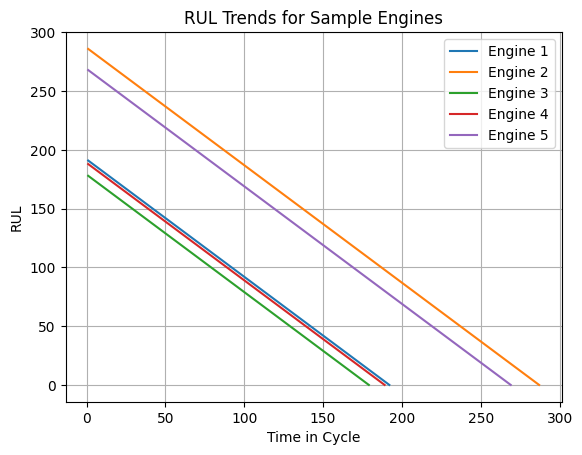

In [14]:
for engine_id in df['unit_number'].unique()[:5]:
    engine_data = df[df['unit_number'] == engine_id]
    plt.plot(engine_data['time_in_cycle'], engine_data['RUL'], label=f'Engine {engine_id}')

plt.xlabel('Time in Cycle')
plt.ylabel('RUL')
plt.title('RUL Trends for Sample Engines')
plt.legend()
plt.grid(True)
plt.show()


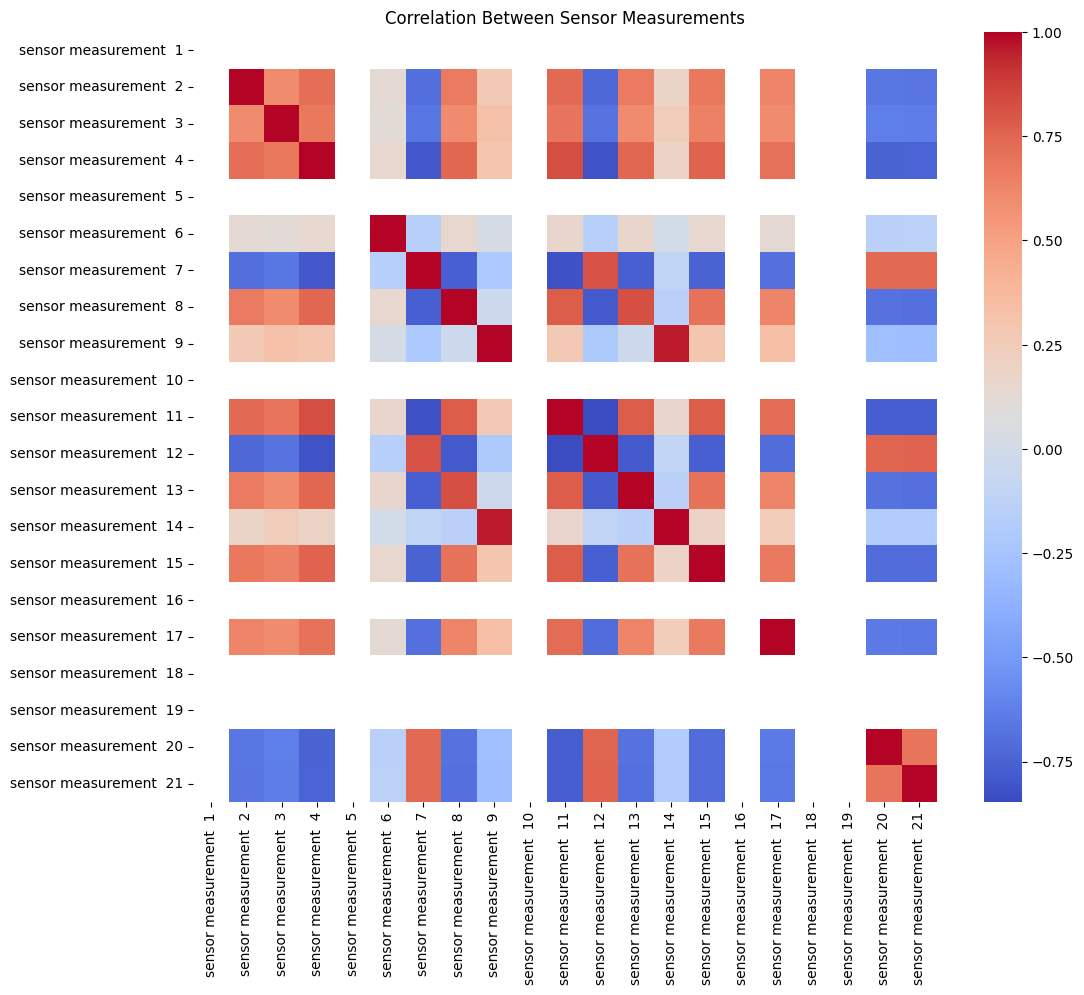

In [15]:
import seaborn as sns

# Only sensor columns
sensor_columns = [col for col in df.columns if 'sensor measurement' in col]

# Compute correlation matrix
corr_matrix = df[sensor_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Sensor Measurements")
plt.show()


In [16]:
window = 5
sensor = 'sensor measurement  2'

rolling_mean = df[sensor].rolling(window=window).mean()
rolling_std = df[sensor].rolling(window=window).std()

# Avoid divide-by-zero
rolling_std = rolling_std.replace(0, 1e-8)

df['z_score'] = (df[sensor] - rolling_mean) / rolling_std


In [17]:
# Function to create sliding window sequences
def create_sequences(df, seq_length=30):
    xs, ys = [], []
    for unit in df['unit_number'].unique():
        unit_df = df[df['unit_number'] == unit]
        for start in range(0, len(unit_df) - seq_length):
            end = start + seq_length
            seq_x = unit_df.iloc[start:end][feature_cols].values
            seq_y = unit_df.iloc[end]['RUL']
            xs.append(seq_x)
            ys.append(seq_y)
    return np.array(xs), np.array(ys)

# Generate sequences
X, y = create_sequences(df)


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# LSTM Model
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val))


NameError: name 'Sequential' is not defined

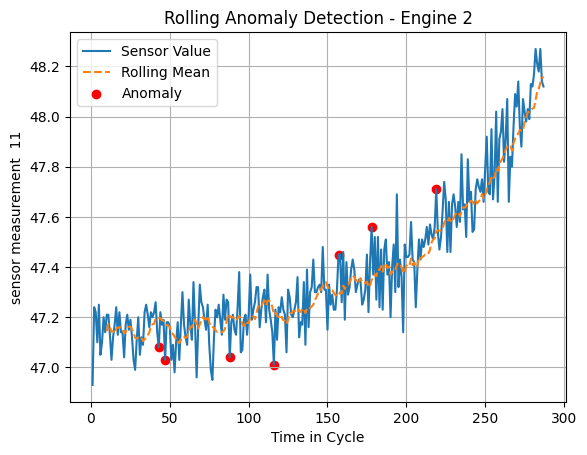

In [46]:
sensor = 'sensor measurement  11'
window_size = 10

df['rolling_mean'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=window_size).mean())
df['rolling_std'] = df.groupby('unit_number')[sensor].transform(lambda x: x.rolling(window=window_size).std())
df['anomaly'] = abs(df[sensor] - df['rolling_mean']) > 2 * df['rolling_std']

# Plot for an engine
engine_id = 2
engine_data = df[df['unit_number'] == engine_id]

plt.plot(engine_data['time_in_cycle'], engine_data[sensor], label='Sensor Value')
plt.plot(engine_data['time_in_cycle'], engine_data['rolling_mean'], label='Rolling Mean', linestyle='--')
plt.scatter(engine_data[engine_data['anomaly']]['time_in_cycle'], engine_data[engine_data['anomaly']][sensor], color='red', label='Anomaly')
plt.legend()
plt.title(f'Rolling Anomaly Detection - Engine {engine_id}')
plt.xlabel('Time in Cycle')
plt.ylabel(sensor)
plt.grid(True)
plt.show()